In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

In [11]:
from sklearn.preprocessing import StandardScaler

In [2]:
gender = pd.read_csv('Datasets/weight-height.csv')

gender.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


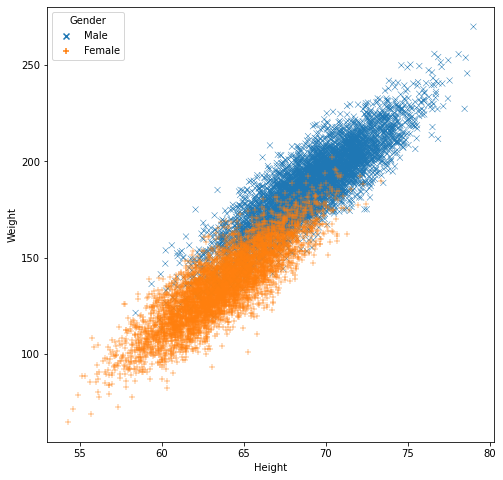

In [3]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Height', y='Weight', hue='Gender', 
                data=gender, style='Gender', markers=['x', '+'])
plt.show()

In [4]:
class kNN:
    def __init__(self, k=5):
        self.k = k
        
    def fit(self, X, y):
        pass 
    
    def predict(self, X):
        y_pred = [self.classify(i) for i in X]
        return np.array(y_pred)
        
    def classify(self, test_point):
        
        distances = np.linalg.norm(X - test_point, axis=1)
        min_args = np.argsort(distances)[:self.k]
        
        return mode(y[min_args])[0][0]

In [12]:
X = gender[['Height', 'Weight']]
y, labels = gender['Gender'].factorize()

scalar = StandardScaler()
X = scalar.fit_transform(X)

In [20]:
model = kNN(k=20)
model.fit(X, y)
y_pred = model.predict(X)

mean_accuracy = sum(y == y_pred)/len(y)
print('Mean Accuracy = {}%'.format(100 * mean_accuracy))

Mean Accuracy = 92.17999999999999%


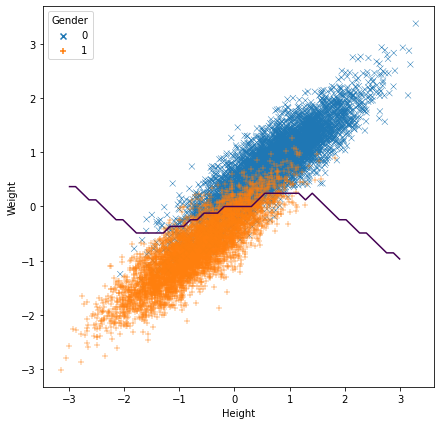

In [21]:
x_range = np.linspace(-3, 3, 50)
y_range = np.linspace(-3, 3, 50)
mesh_x, mesh_y = np.meshgrid(x_range, y_range)
plot_grid = np.c_[mesh_x.ravel(), mesh_y.ravel()]
pred_grid = model.predict(plot_grid)
pred_grid = pred_grid.reshape(mesh_x.shape)

df_normalized = pd.DataFrame(X, columns=['Height', 'Weight'])
df_normalized['Gender'] = y

plt.figure(figsize=(7, 7))
sns.scatterplot(x='Height', y='Weight', hue='Gender',
                data=df_normalized, style='Gender', markers=['x', '+'])

plt.contour(mesh_x, mesh_y, pred_grid, levels=[0.5])
plt.show()